In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [6]:
# import some data to play with 
fraud = pd.read_csv("Fraud_check.csv")


In [7]:
fraud 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [8]:
# complete Fraud_check dataset
label_encoder = preprocessing.LabelEncoder()
fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])

In [10]:
x=fraud.iloc[:,0:5]
y=fraud.iloc[:,5]

In [11]:
x
pd.set_option("display.max_rows",None)


In [12]:
x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience
0,NO,Single,68833,50047,10
1,YES,Divorced,33700,134075,18
2,NO,Married,36925,160205,30
3,YES,Single,50190,193264,15
4,NO,Married,81002,27533,28
5,NO,Divorced,33329,116382,0
6,NO,Divorced,83357,80890,8
7,YES,Single,62774,131253,3
8,NO,Single,83519,102481,12
9,YES,Divorced,98152,155482,4


In [13]:
y

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     0
16     0
17     0
18     0
19     1
20     0
21     1
22     0
23     1
24     0
25     1
26     0
27     1
28     1
29     1
30     1
31     0
32     0
33     0
34     1
35     1
36     1
37     1
38     0
39     1
40     1
41     0
42     0
43     0
44     0
45     1
46     1
47     0
48     0
49     1
50     1
51     0
52     0
53     1
54     0
55     1
56     1
57     0
58     0
59     0
60     0
61     0
62     1
63     0
64     0
65     0
66     1
67     0
68     0
69     0
70     1
71     0
72     1
73     1
74     0
75     1
76     0
77     0
78     0
79     1
80     0
81     0
82     1
83     1
84     1
85     1
86     1
87     0
88     1
89     0
90     0
91     1
92     0
93     1
94     1
95     1
96     0
97     1
98     1
99     0
100    0
101    1
102    0
103    1
104    0
105    0
106    1
107    1
108    1
109    1
110    1
1

In [14]:
fraud['Urban'].unique()

array([1, 0])

In [16]:
fraud.Urban.value_counts()

1    302
0    298
Name: Urban, dtype: int64

In [17]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [18]:
fraud.loc[fraud["Taxable.Income"]>=30000,"Income"]="Good"
fraud.loc[fraud["Taxable.Income"]<=30000,"Income"]="Risky"

In [20]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in fraud.columns:
    if fraud[column_name].dtype == object:
        fraud[column_name]= le.fit_transform(fraud[column_name])
    else:
        pass

In [21]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital.Status   600 non-null    int32
 2   Taxable.Income   600 non-null    int64
 3   City.Population  600 non-null    int64
 4   Work.Experience  600 non-null    int64
 5   Urban            600 non-null    int32
 6   Income           600 non-null    int32
dtypes: int32(4), int64(3)
memory usage: 23.6 KB


In [22]:
#dropping the taxable income variable - we taken that as income description 
fraud.drop(["Taxable.Income"],axis=1,inplace = True)

In [23]:
fraud

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
5,0,0,116382,0,0,0
6,0,0,80890,8,1,0
7,1,2,131253,3,1,0
8,0,2,102481,12,1,0
9,1,0,155482,4,1,0


In [24]:
## collecting the columns name 
colnames=list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Income']

In [25]:
x=fraud.iloc[:,0:5]
y=fraud.iloc[:,5]

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, stratify =y, random_state = 10)

In [27]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

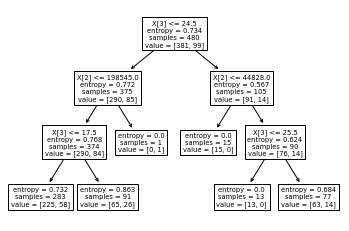

In [28]:
# plot the decision tree
tree.plot_tree(model);

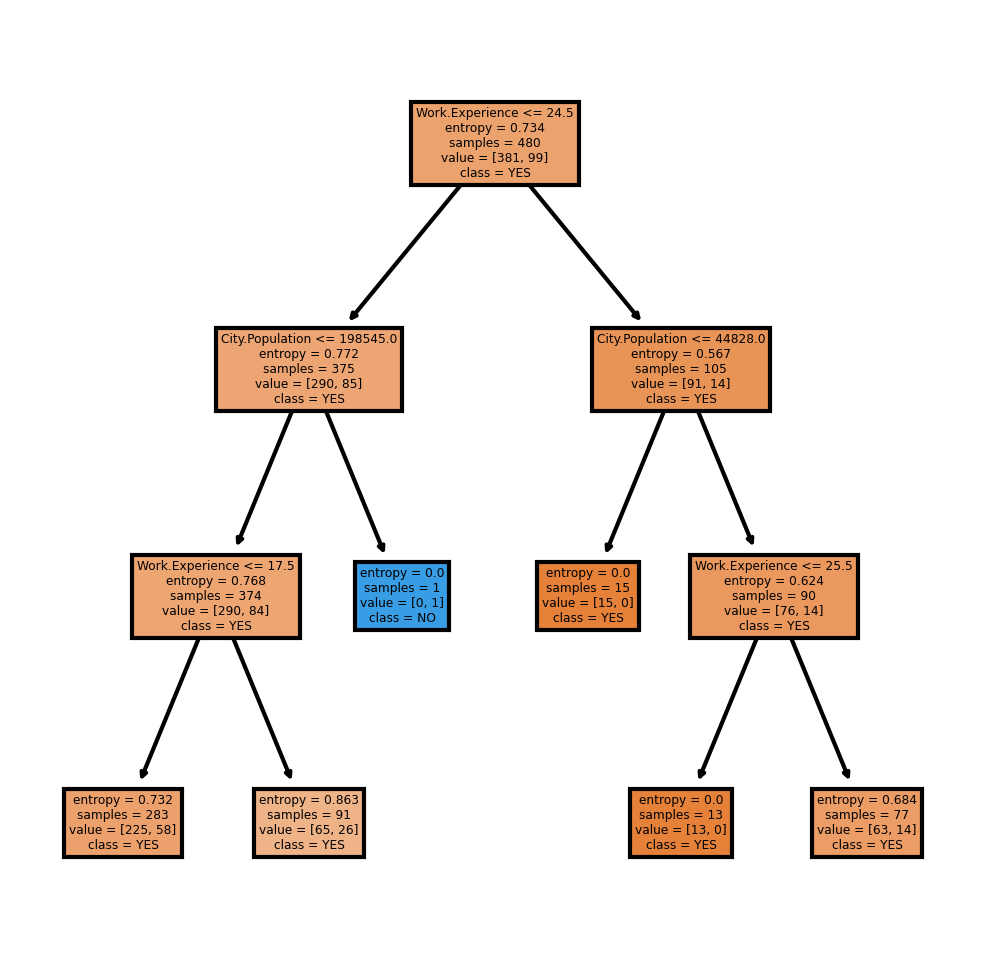

In [29]:
fn = ['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Income']
cn = ['YES','NO']
fig,ares = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled = True);

In [30]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.7958333333333333

In [31]:
model.score(x_test,y_test)

0.7833333333333333

In [32]:
model.feature_importances_

array([0.        , 0.25591599, 0.14934603, 0.59473798, 0.        ])

In [33]:
y_pred = model.predict(x_test)

In [34]:
# here first columns is 'good ' and second columns is 'bad'
model.predict_proba(x_test)

array([[0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.96296296, 0.03703704],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.96296296, 0.03703704],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.96296296, 0.03703704],
       [0.71428571, 0.28571429],
       [0.96296296, 0.03703704],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.79365079, 0.20634921],
       [0.795053  , 0.204947  ],
       [0.71428571, 0.28571429],
       [0.795053  , 0.204947  ],
       [0.795053  , 0.204947  ],
       [0.71428571, 0.28571429],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.71428571, 0.28571429],
       [0.